In [53]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline 
pd.set_option('display.max_columns', None) #best practice to view all columns later

In [54]:
url = '/Users/debbie/Downloads/amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(url)
df = data.copy()

# Part 1: Analyzing Best-Seller Trends Across Product Categories

## Crosstab Analysis:

    Create a crosstab between the product category and the isBestSeller status.

    Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [77]:
result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(ascending=False, by=True)
result = result[result[True] > 0] #filter out who had no bestsellers
result['Proportion'] = result[True] / (result[True] + result[False]) #calculate percentage
result['Proportion'] = result['Proportion'].round(2) #round percentage
result = result.sort_values(ascending=False, by='Proportion') #sort by highest bestseller percentage
result


isBestSeller,False,True,Proportion
category,,,
Health & Personal Care,9017,552,0.06
Grocery,9008,556,0.06
Smart Home Security & Lighting,98,6,0.06
Power & Hand Tools,8353,306,0.04
Mobile Phone Accessories,248,11,0.04
...,...,...,...
"Inflatable Beds, Pillows & Accessories",253,1,0.00
Gifts for Him,437,1,0.00
Camcorders,487,1,0.00


In [57]:
print(f"Bestseller is more prevelant in these categories: {', '.join(map(str, result.head().index))}") 


Bestseller is more prevelant in these categories: Grocery, Health & Personal Care, Baby, Sports & Outdoors, Power & Hand Tools


## Statistical Tests:

    Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    Compute Cramér's V to understand the strength of association between best-seller status and category.

In [62]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [63]:
# Chi-square test 
_, chi2_pvalue, _, _ = chi2_contingency(crosstab)

In [64]:
chi2_pvalue

0.0

In [65]:
# Check if the chi2_pvalue is smaller than 0.5
float(chi2_pvalue) < 0.05

True

The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the 0( p )-value, we reject the null hypothesis. This implies that there's a significant association between category and Bestseller in the dataset.

In [68]:
cramer = association(crosstab, method='cramer')
cramer

0.1222829439760564

In [71]:
print(f"The Cramer valuer of {cramer:.2f} suggests a weak association between two variables")

The Cramer valuer of 0.12 suggests a weak association between two variables


### Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

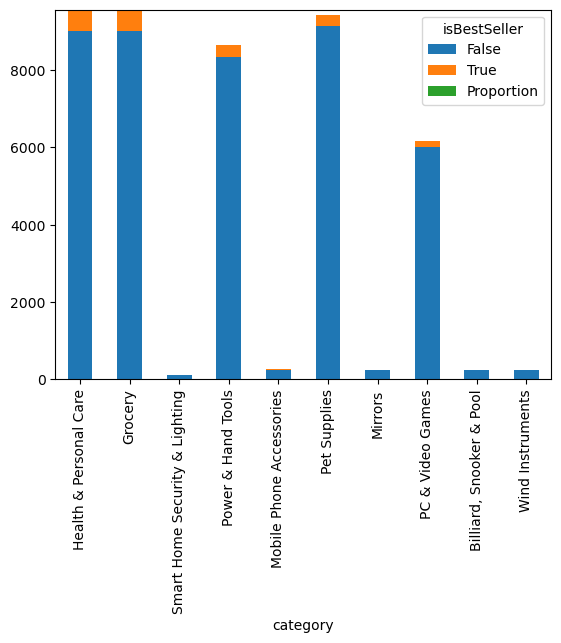

In [84]:
result.head(10).plot(kind='bar', stacked=True)
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

### Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.


In [106]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = (Q3 - Q1)
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# Identify the outliers
df_new = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
    

In [109]:
len(df)

2443631

In [108]:
len(df_new)

2115943

### Violin Plots:

    Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
    Which product category tends to have the highest median price? Don't filter here by top categories.


In [110]:
top_20_categories = df_new['category'].value_counts().head(20).index
top_20_df = df_new[df_new['category'].isin(top_20_categories)]

In [111]:
top_20_df.shape

(1033003, 9)

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_53371/1236946901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_20_df, x="category", y="price", palette="coolwarm")


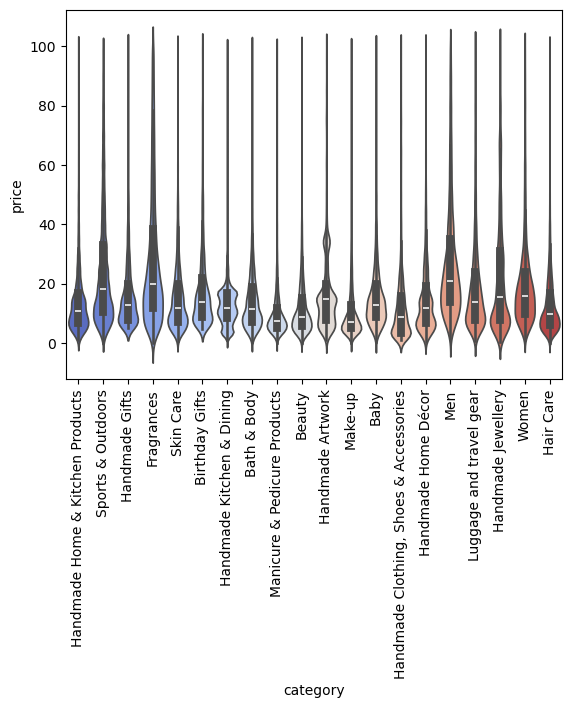

In [112]:
sns.violinplot(data=top_20_df, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_53371/2547266139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_20_df, x="category", y="price", palette="coolwarm")


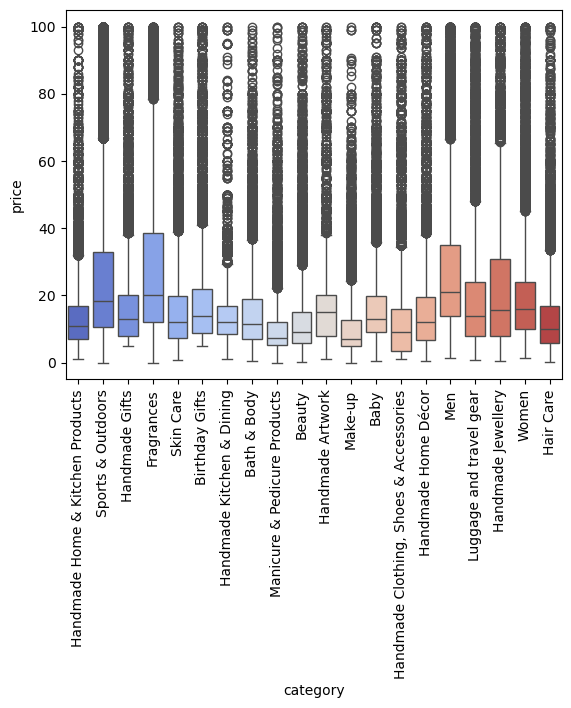

In [113]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=top_20_df, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

Men and Fragrance products tend to have the highest median price

### Bar charts

 Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
 Which product category commands the highest average price? Don't filter here by top categories.


In [ ]:
df.groupby

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
